<a href="https://colab.research.google.com/github/audrey-yung/bio108-work/blob/main/timeseries_demo_vers1" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Audrey Yung

My github: https://github.com/audrey-yung

File name: timeseries_demo_vers1

# Accessing in the data



The data that we will be using for this workshop is Hourly precipitation data from San Bernardino, CA, from 1948-2014. This data was obtained from NOAA's [Climate Data Online](https://www.ncei.noaa.gov/cdo-web/) Database.

I downloaded and uploaded the data to my own Google Drive, and you can access it through this [link](https://drive.google.com/file/d/1ZC6-BKGuLTJEH3zPe1nflxRepBC4phED/view?usp=sharing). To use my copy of the data for this workshop, right click on the file and add a shortcut of it to your own Google Drive.

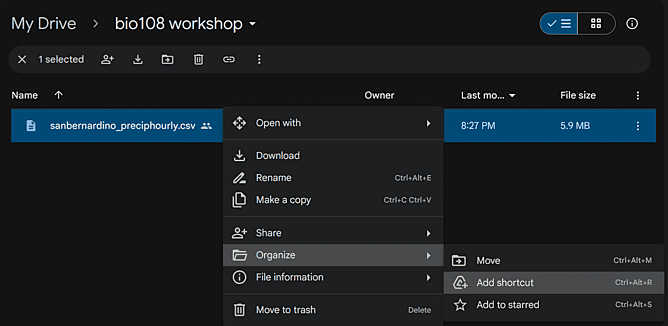

If you'd like to download the data yourself and put it in your own Google Drive, you can request and download the data from this [link](https://www.ncei.noaa.gov/cdo-web/datasets/PRECIP_HLY/locations/CITY:US060029/detail).

In [17]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading in the data

click on folder icon on left taskbar. open drive folder then navigate to where you saved either the shortcut or your own data file

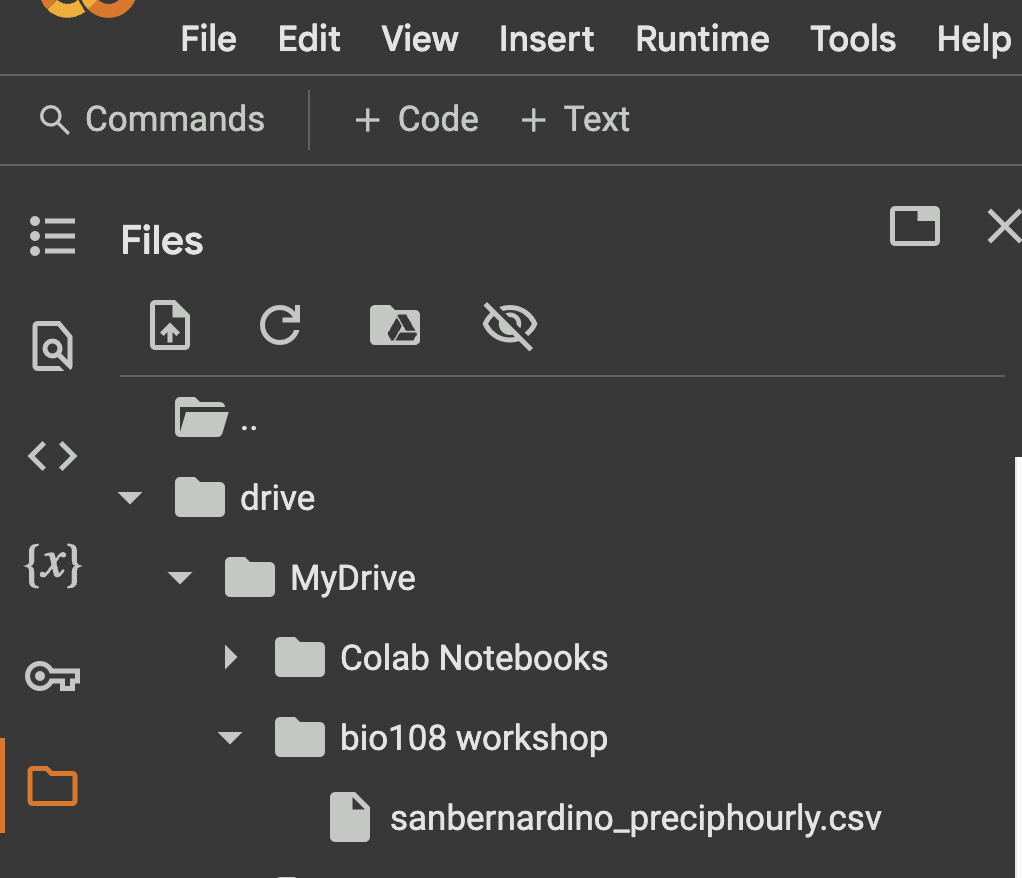


In [18]:
sb_precip_hourly_PATH = "/content/drive/MyDrive/bio108 workshop/sanbernardino_preciphourly.csv"

sb_precip_data = pd.read_csv(sb_precip_hourly_PATH,
                             # Make sure the dates import in datetime format
                             parse_dates=['DATE'],
                             # Set DATE as the index so you can subset data by time period
                             index_col=['DATE'],
                             na_values=['NA']
                             )

note that when using this code for new datasets, take a look at the headers of the dataset prior to reading in the data. you will need the name of the header (IE "DATE") to be able to use the `parse_dates` or `index_col` functions.

now that we have loaded in the data, we can use `.head()` to look at a subset of the data we will be working with to understand what data are available.

In [19]:
# we can use head()
sb_precip_data.head()
# hpcp stands for "Hourly Precipitation"

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,,,
1948-07-01 01:00:00,COOP:047473,RIVERSIDE CITRUS EXPERIMENTAL CA US,319.1,33.96667,-117.33333,0.00
1948-07-01 13:00:00,COOP:047473,RIVERSIDE CITRUS EXPERIMENTAL CA US,319.1,33.96667,-117.33333,25399.75
1948-07-02 00:00:00,COOP:047473,RIVERSIDE CITRUS EXPERIMENTAL CA US,319.1,33.96667,-117.33333,25399.75
1948-08-01 01:00:00,COOP:047473,RIVERSIDE CITRUS EXPERIMENTAL CA US,319.1,33.96667,-117.33333,0.00
1948-08-01 13:00:00,COOP:047473,RIVERSIDE CITRUS EXPERIMENTAL CA US,319.1,33.96667,-117.33333,25399.75


# Using `matplotlib` to make a figure

to make our first preliminary figure, we will use the `matplotlib` package (which we have already loaded in under the abbreviation `plt`). here, we are plotting all of the precipitation data as a function of each of the date-time measurements.

In [22]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [64]:
sb_precip_data.STATION_NAME

,STATION_NAME
DATE,
1948-07-01 01:00:00,RIVERSIDE CITRUS EXPERIMENTAL CA US
1948-07-01 13:00:00,RIVERSIDE CITRUS EXPERIMENTAL CA US
1948-07-02 00:00:00,RIVERSIDE CITRUS EXPERIMENTAL CA US
1948-08-01 01:00:00,RIVERSIDE CITRUS EXPERIMENTAL CA US
1948-08-01 13:00:00,RIVERSIDE CITRUS EXPERIMENTAL CA US
...,...
2008-05-22 21:00:00,LYTLE CREEK RANGER STATION CA US
2008-06-01 01:00:00,LYTLE CREEK RANGER STATION CA US
2008-07-01 01:00:00,LYTLE CREEK RANGER STATION CA US


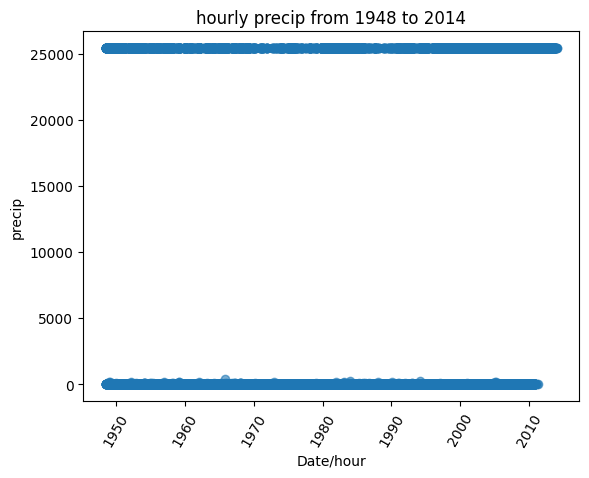

In [65]:
f, ax = plt.subplots()
ax.scatter(x=sb_precip_data.index.values,
           y=sb_precip_data.HPCP,
           alpha = 0.6)
plt.title("hourly precip from 1948 to 2014")
plt.xlabel("Date/hour")
plt.ylabel("precip")
plt.xticks(rotation=60)
plt.show()

evidently, this figure has too much information for us to gain anything valuable. what we will do next is take monthly averages across the entire sampling period.

In [24]:
sbMONTHLYall = sb_precip_data.resample("ME").mean(numeric_only=True)
sbMONTHLYall

,HPCP
DATE,
1948-07-31,16933.166667
1948-08-31,16933.166667
1948-09-30,16510.028000
1948-10-31,2615.738529
1948-11-30,16041.987368
...,...
2013-09-30,25399.750000
2013-10-31,25399.750000
2013-11-30,25399.750000


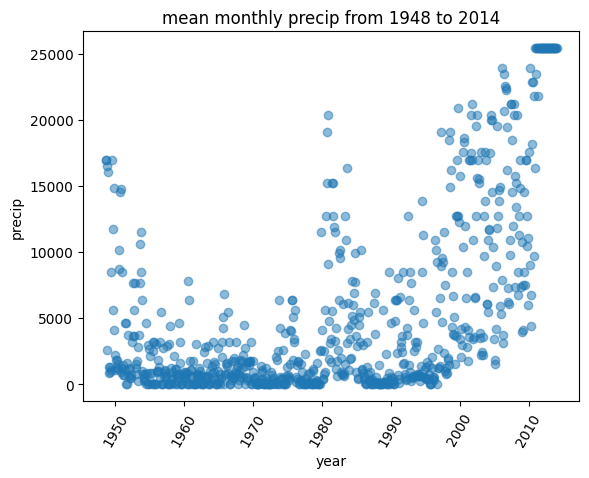

In [70]:
f, ax = plt.subplots()
ax.scatter(x=sbMONTHLYall.index.values,
           y=sbMONTHLYall.HPCP,
           alpha=0.5)
plt.title("mean monthly precip from 1948 to 2014")
plt.xlabel("year")
plt.ylabel("precip")
plt.xticks(rotation=60)
plt.show()

help!! i am trying to plot the points by site that they were collected from.

In [72]:
# reference example https://stackoverflow.com/questions/69999116/how-to-scatter-plot-each-group-of-a-pandas-dataframe

colorscheme = {"RIVERSIDE CITRUS EXPERIMENTAL CA US" : "red",
          'SANTA ANA RIVER PH 3 CA US' : "orange",
          'ETIWANDA CA US' : "yellow",
          'LYTLE CREEK FOOTHILL CA US' : "green",
          'CRESTLINE CA US' : "bluegreen",
          'RUNNING SPRINGS 1 E CA US' : "blue",
          'CRESTLINE LAKE GREGO CA US': "teal",
       'LYTLE CREEK RANGER STATION CA US' : "purple"}

for station, sbMONTHLYall in sbMONTHLYall.groupby("STATION_NAME"):
  sbMONTHLYall.plot(kind='scatter', x='DATE', y='HPCP', color=colorscheme[station], ax=ax)

KeyError: 'STATION_NAME'

This could be a good stopping point but if I wanted to see even broader trends, I could average by year.

In [26]:
sbYEARall = sb_precip_data.resample("YE").mean(numeric_only=True)

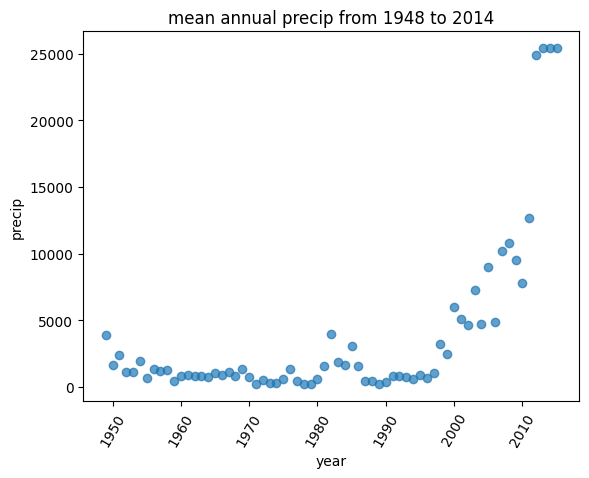

In [37]:
f, ax = plt.subplots()
ax.scatter(x=sbYEARall.index.values,
           y=sbYEARall.HPCP,
           alpha = 0.7)
plt.title("mean annual precip from 1948 to 2014")
plt.xlabel("year")
plt.ylabel("precip")
plt.xticks(rotation=60)
plt.show()

# Using `leafmap` to make an interactive geospatial figure

In [38]:
# import the necessary packages
import geopandas as gpd

We can plot the locations of the different weather stations that collected data. To see the different stations, we can use `.STATION_NAME.unique()`, where `.STATION_NAME` calls the column for station names and `.unique()` calls for all the unique values in that column.

Similarly, we can use `.value_counts()` to see each of the station names and how many data points they each collected.

In [46]:
sb_precip_data.STATION_NAME.unique()

array(['RIVERSIDE CITRUS EXPERIMENTAL CA US',
       'SANTA ANA RIVER PH 3 CA US', 'ETIWANDA CA US',
       'LYTLE CREEK FOOTHILL CA US', 'CRESTLINE CA US',
       'RUNNING SPRINGS 1 E CA US', 'CRESTLINE LAKE GREGO CA US',
       'LYTLE CREEK RANGER STATION CA US'], dtype=object)

In [47]:
sb_precip_data.STATION_NAME.value_counts()

,count
STATION_NAME,
RUNNING SPRINGS 1 E CA US,13664
SANTA ANA RIVER PH 3 CA US,11356
ETIWANDA CA US,11173
LYTLE CREEK FOOTHILL CA US,9624
CRESTLINE CA US,9324
LYTLE CREEK RANGER STATION CA US,9315
RIVERSIDE CITRUS EXPERIMENTAL CA US,8998
CRESTLINE LAKE GREGO CA US,3220


In [43]:
sb_spatialvers = gpd.GeoDataFrame(data=sb_precip_data)

help! how to make the lat/long coordinates into one column to set active geometry column?

In [45]:
# sb_spatialvers.crs
# AttributeError: The CRS attribute of a GeoDataFrame without an active
# geometry column is not defined. Use GeoDataFrame.set_geometry to set the active geometry column.

AttributeError: The CRS attribute of a GeoDataFrame without an active geometry column is not defined. Use GeoDataFrame.set_geometry to set the active geometry column.